## PCA Demonstration in Python

In [1]:
# Importing the required libraries

In [2]:
import numpy as np, pandas as pd

In [3]:
#data = pd.read_csv("Iris.csv")
data = pd.read_csv("Ratings.csv")

In [4]:
data.head()

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2


In [5]:
#y = data.pop("iris")

In [6]:
data.head()

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2


In [7]:
data.describe()

,B1,B2,B3,B4,B5
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.285714,2.285714,3.142857,3.142857,3.142857
std,1.380131,1.380131,1.214986,1.772811,1.214986
min,1.000000,0.000000,1.000000,0.000000,2.000000
25%,2.500000,1.500000,2.500000,2.500000,2.000000
50%,4.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.500000,4.000000
max,5.000000,4.000000,4.000000,5.000000,5.000000


Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X = data.copy()

In [11]:
x = scaler.fit_transform(X)

In [12]:
x[:5,:5]

array([[-1.78885438, -1.78885438,  0.76200076, -1.91485422, -0.12700013],
       [-1.00623059,  0.55901699,  0.76200076, -0.08703883, -1.01600102],
       [-0.2236068 ,  0.55901699, -1.01600102,  0.52223297, -1.01600102],
       [ 0.55901699,  1.34164079, -0.12700013,  1.13150476,  0.76200076],
       [ 1.34164079, -1.00623059,  0.76200076, -0.69631062, -1.01600102]])

### Applying PCA on the data

In [13]:
from sklearn.decomposition import PCA

In [28]:
?PCA

In [15]:
pca = PCA(random_state=42)

In [16]:
pca.fit(x)

PCA(random_state=42)

In [17]:
pca.components_

array([[-0.3274596 , -0.48982545,  0.45663627, -0.56625117, -0.3516876 ],
       [ 0.76434418,  0.09246185,  0.41249826,  0.10582543, -0.47526303],
       [-0.47957573,  0.50848413, -0.06353977,  0.2091544 , -0.68093182],
       [ 0.21245628, -0.42239215, -0.76324465, -0.1078077 , -0.42694532],
       [-0.18280492, -0.5608481 ,  0.18641032,  0.78281066, -0.06701072]])

In [18]:
pca.explained_variance_ratio_

array([5.92796465e-01, 1.63738263e-01, 1.61138433e-01, 8.21840061e-02,
       1.42831615e-04])

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

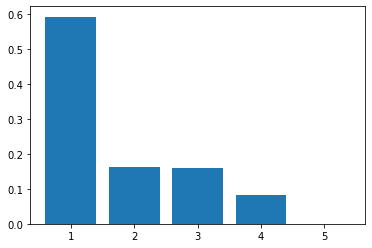

In [20]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

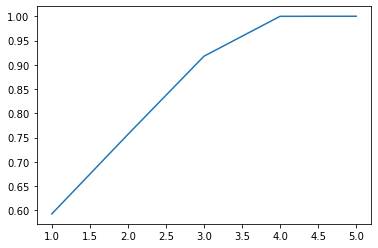

In [22]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 2 components

In [23]:
pc2 = PCA(n_components=2, random_state=42)

In [24]:
newdata = pc2.fit_transform(x)

In [25]:
newdata.shape

(7, 2)

Making a dataframe out of it for convenience



In [26]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,2.938914,-1.360659
1,0.810237,0.070562
2,-0.602942,-0.000190
3,-1.806920,0.256536
4,1.153103,1.655942


In [27]:
df_final = pd.concat([df, y], axis=1)

NameError: name 'y' is not defined

In [ ]:
df_final.head()

Plotting the data

In [47]:
import seaborn as sns

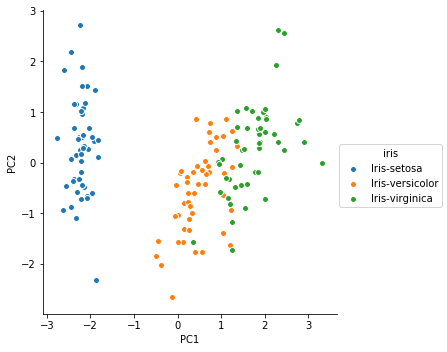

In [59]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "iris", size=5)